In [40]:
import scipy.io as sio
import matplotlib.pyplot as plt
import random
import operator
from PIL import Image
from PIL import ImageDraw
import pylab

In [41]:
DATA_FILE= '/home/ankdesh/explore/DeepLearning-UdacityCapston/data/train_32x32.mat'

In [60]:
data_file = sio.loadmat(DATA_FILE)

In [61]:
asd = data_file['X']

In [62]:
asd.shape

(32, 32, 3, 73257)

In [63]:
bsd = asd.transpose(3,0,1,2)

In [64]:
type (bsd)

numpy.ndarray

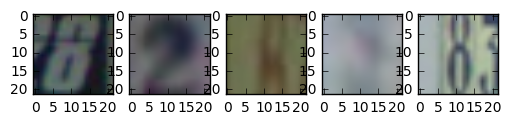

In [65]:
f,ax = plt.subplots(1,5)#, figsize=(15,15))
for i in range(5):
    ax[i].imshow(bsd[random.randint(0,1000),5:27,5:27,:])
plt.show()

In [47]:
# suppose img1 and img2 are your two images
img1 = Image.fromarray(data_file['X'][5:27,5:27,:,random.randint(0,1000)])
img2 = Image.fromarray(data_file['X'][5:27,5:27,:,random.randint(0,1000)])

# suppose img2 is to be shifted by `shift` amount 
shift = (12, 12)

# compute the size of the panorama
nw, nh = (100,100) # map(max, map(operator.add, img2.size, shift), img1.size)

# paste img1 on top of img2
newimg1 = Image.new('RGBA', size=(nw, nh), color=(0, 0, 0, 0))
newimg1.paste(img2, shift)
newimg1.paste(img1, (0, 0))

# paste img2 on top of img1
newimg2 = Image.new('RGBA', size=(nw, nh), color=(0, 0, 0, 0))
newimg2.paste(img1, (0, 0))
newimg2.paste(img2, shift)

# blend with alpha=0.5
result = Image.blend(newimg1, newimg2, alpha=0.5)

In [48]:
%matplotlib inline
result.save('asd.png')
#plt.close()